In [1]:
#skㅣearn에서 제공하는 이미지데이터 다운로드 
from sklearn.datasets import fetch_olivetti_faces
faces=fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\student\scikit_learn_data


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [26]:
faces.data.shape #400, 4096

klist=np.random.choice(range(len(faces.data)),10)

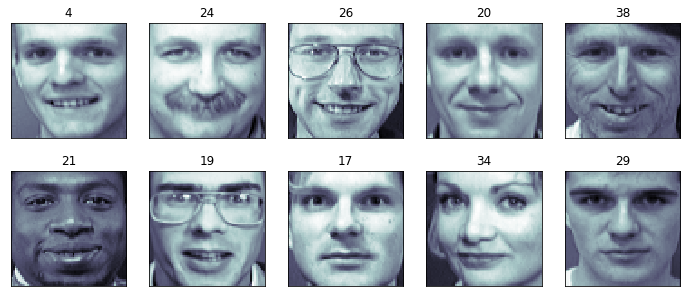

In [27]:
#2행 5열로 얼굴이미지 출력(Klist)
fig=plt.figure(figsize=(12,5))

for i in range(2):
    for j in range(5):
                k=klist[i*5+j]
                ax=fig.add_subplot(2, 5, i*5+j+1)
                ax.imshow(faces.images[k], cmap=plt.cm.bone) #cmap:흑백
                plt.title(faces.target[k])
                ax.xaxis.set_ticks([])
                ax.yaxis.set_ticks([])
                
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(faces.data, faces.target, test_size=0.4, random_state=0)

In [29]:
from sklearn.svm import SVC
model=SVC(kernel="linear").fit(xtrain, ytrain)

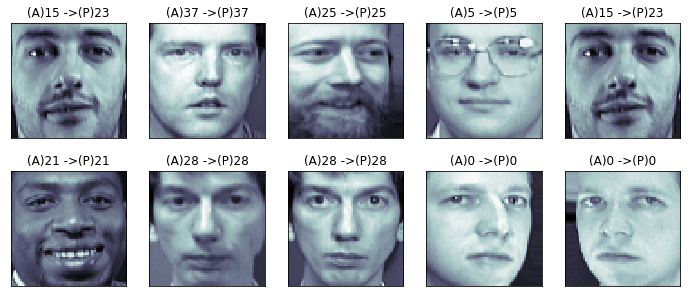

In [39]:
#2행 5열로 얼굴이미지 출력(Klist)
fig=plt.figure(figsize=(12,5))

klist=np.random.choice(range(len(ytest)),10)

for i in range(2):
    for j in range(5):
                k=klist[i*5+j]
                ax=fig.add_subplot(2, 5, i*5+j+1)
                ax.imshow(xtest[k:(k+1),:].reshape(64,64), cmap=plt.cm.bone) #cmap:흑백
                plt.title("(A)%d ->(P)%d" %(ytest[k], model.predict(xtest[k:(k+1),:])))
                ax.xaxis.set_ticks([])
                ax.yaxis.set_ticks([])
                
plt.show()

In [42]:
from sklearn.metrics import classification_report, accuracy_score
#sklearn-org 사이트 참고

ypred_train= model.predict(xtrain)
ypred_test=model.predict(xtest)

print(classification_report(ytrain, ypred_train)) #240건
print(classification_report(ytest, ypred_test)) #160건

# precision    recall  f1-score   support(해당 종류의 갯수)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         8
          17       1.00    

In [47]:
from sklearn.metrics import confusion_matrix

#양성1, 음성:0
xtrue=[1,0,1,1,0,1] #정답
xpred=[0,0,1,1,0,0] #예측값

confusion_matrix(xtrue, xpred, labels=[1,0])
print(classification_report(xtrue, xpred))

#결과
#행(정답) 열(예측)
#[2, 0, 0], # 2개:정답:0인데 예측:0로 한것 
#[0, 0, 1], #1개: 정답:1, 예측 2로 한것
#[1, 0, 2] #1개 :정답:2인데 예측 0으로 한것 / 2개: 정답이 2인데 예측도 2로한것

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6

